<a href="https://colab.research.google.com/github/jprussoibanez/Reinforcement-Learning-Algorithms-with-Python/blob/master/Chapter02/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### TensorFlow installation

`pip3 install tensorflow`

or

`pip3 install tensorflow-gpu`

#### OpenAI Gym installation

On OSX: 

`brew install cmake boost boost-python sdl2 swig wget`
 
On Ubuntu 16.04:

`apt-get install -y python-pyglet python3-opengl zlib1g-dev libjpeg-dev patchelf cmake swig libboost-all-dev libsdl2-dev libosmesa6-dev xvfb ffmpeg`

On Ubuntu 18.04

`sudo apt install -y python3-dev zlib1g-dev libjpeg-dev cmake swig python-pyglet python3-opengl libboost-all-dev libsdl2-dev libosmesa6-dev patchelf ffmpeg xvfb `

Then:

```
git clone https://github.com/openai/gym.git 

cd gym

pip install -e '.[all]'
```

PyBox2D:

```
git clone https://github.com/pybox2d/pybox2d
cd pybox2d
pip3 install -e .
```


#### Duckietown installation

```
git clone https://github.com/duckietown/gym-duckietown.git
cd gym-duckietown
pip3 install -e .
```

#### Roboschool installation

```
git clone https://github.com/openai/roboschool
cd roboschool
ROBOSCHOOL_PATH=`pwd`
git clone https://github.com/olegklimov/bullet3 -b roboschool_self_collision
mkdir bullet3/build
cd    bullet3/build
cmake -DBUILD_SHARED_LIBS=ON -DUSE_DOUBLE_PRECISION=1 -DCMAKE_INSTALL_PREFIX:PATH=$ROBOSCHOOL_PATH/roboschool/cpp-household/bullet_local_install -DBUILD_CPU_DEMOS=OFF -DBUILD_BULLET2_DEMOS=OFF -DBUILD_EXTRAS=OFF  -DBUILD_UNIT_TESTS=OFF -DBUILD_CLSOCKET=OFF -DBUILD_ENET=OFF -DBUILD_OPENGL3_DEMOS=OFF ..

make -j4
make install
cd ../..
pip3 install -e $ROBOSCHOOL_PATH
```

## RL cycle

In [0]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [0]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [4]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

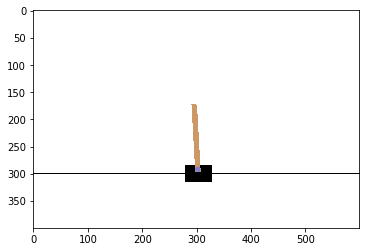

In [5]:
import gym

# create the environment 
env = gym.make("CartPole-v1")
# reset the environment before starting
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

# loop 10 times
for i in range(10):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()

In [6]:
import gym

# create and initialize the environment
env = gym.make("CartPole-v1")
env.reset()

# play 10 games
for i in range(10):
    # initialize the variables
    done = False
    game_rew = 0

    while not done:
        # choose a random action
        action = env.action_space.sample()
        # take a step in the environment
        new_obs, rew, done, info = env.step(action)
        game_rew += rew
    
        # when is done, print the cumulative reward of the game and reset the environment
        if done:
            print('Episode %d finished, reward:%d' % (i, game_rew))
            env.reset()

Episode 0 finished, reward:12
Episode 1 finished, reward:18
Episode 2 finished, reward:11
Episode 3 finished, reward:18
Episode 4 finished, reward:39
Episode 5 finished, reward:55
Episode 6 finished, reward:17
Episode 7 finished, reward:15
Episode 8 finished, reward:22
Episode 9 finished, reward:16


In [7]:
import gym

env = gym.make('CartPole-v1')
print(env.observation_space)

Box(4,)


In [8]:
print(env.action_space)

Discrete(2)


In [9]:
print(env.action_space.sample())
print(env.action_space.sample())
print(env.action_space.sample())

0
1
0


In [0]:
print(env.observation_space.low)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [0]:
print(env.observation_space.high)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


## TensorFlow

In [10]:
import tensorflow as tf

# create two constants: a and b
a = tf.constant(4)
b = tf.constant(3)

# perform a computation
c = a + b
print(c) # print the shape of c

# create a session
session = tf.Session()
# run the session. It compute the sum
res = session.run(c)
print(res) # print the actual result

Tensor("add:0", shape=(), dtype=int32)
7


In [0]:
# reset the graph
tf.reset_default_graph()

### Tensor

In [12]:
a = tf.constant(1)
print(a.shape)

()


In [13]:
# array of five elements
b = tf.constant([1,2,3,4,5])
print(b.shape)

(5,)


In [14]:
#NB: a can be of any type of tensor
a = tf.constant([1,2,3,4,5])
first_three_elem = a[:3]
fourth_elem = a[3]

sess = tf.Session()
print(sess.run(first_three_elem))

[1 2 3]


In [15]:
print(sess.run(fourth_elem))

4


#### Constant

In [0]:
a = tf.constant([1.0, 1.1, 2.1, 3.1], dtype=tf.float32, name='a_const')
print(a)

Tensor("a_const:0", shape=(4,), dtype=float32)


#### Placeholder

In [16]:
a = tf.placeholder(shape=(1,3), dtype=tf.float32)
b = tf.constant([[10,10,10]], dtype=tf.float32)

c = a + b

sess = tf.Session()
res = sess.run(c, feed_dict={a:[[0.1,0.2,0.3]]})
print(res)

[[10.1 10.2 10.3]]


In [0]:
tf.reset_default_graph()

In [18]:
import numpy as np

# NB: the fist dimension is 'None', meaning that it can be of any lenght
a = tf.placeholder(shape=(None,3), dtype=tf.float32)
b = tf.placeholder(shape=(None,3), dtype=tf.float32)

c = a + b

print(a)

sess = tf.Session()
print(sess.run(c, feed_dict={a:[[0.1,0.2,0.3]], b:[[10,10,10]]}))

v_a = np.array([[1,2,3],[4,5,6]])
v_b = np.array([[6,5,4],[3,2,1]])
print(sess.run(c, feed_dict={a:v_a, b:v_b}))

Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
[[10.1 10.2 10.3]]
[[7. 7. 7.]
 [7. 7. 7.]]


In [19]:
sess = tf.Session()
print(sess.run(c, feed_dict={a:[[0.1,0.2,0.3]], b:[[10,10,10]]}))

[[10.1 10.2 10.3]]


#### Variable

In [20]:
tf.reset_default_graph()

# variable initialized using the glorot uniform initializer
var = tf.get_variable("first_variable", shape=[1,3], dtype=tf.float32, initializer=tf.glorot_uniform_initializer)

# variable initialized with constant values
init_val = np.array([4,5])
var2 = tf.get_variable("second_variable", shape=[1,2], dtype=tf.int32, initializer=tf.constant_initializer(init_val))

# create the session
sess = tf.Session()
# initialize all the variables
sess.run(tf.global_variables_initializer())

print(sess.run(var))

print(sess.run(var2))

[[0.33523285 1.022731   0.1103096 ]]
[[4 5]]


In [0]:
# not trainable variable
var2 = tf.get_variable("variable", shape=[1,2], trainable=False, dtype=tf.int32)

In [22]:
print(tf.global_variables())

[<tf.Variable 'first_variable:0' shape=(1, 3) dtype=float32_ref>, <tf.Variable 'second_variable:0' shape=(1, 2) dtype=int32_ref>, <tf.Variable 'variable:0' shape=(1, 2) dtype=int32_ref>]


#### Graph

In [23]:
tf.reset_default_graph()

const1 = tf.constant(3.0, name='constant1')

var = tf.get_variable("variable1", shape=[1,2], dtype=tf.float32)
var2 = tf.get_variable("variable2", shape=[1,2], trainable=False, dtype=tf.float32)

op1 = const1 * var
op2 = op1 + var2
op3 = tf.reduce_mean(op2)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(op3)

0.9439568

### Simple Linear Regression Example


In [24]:
tf.reset_default_graph()

np.random.seed(10)
tf.set_random_seed(10)

W, b = 0.5, 1.4
# create a dataset of 100 examples
X = np.linspace(0,100, num=100)
# add random noise to the y labels
y = np.random.normal(loc=W * X + b, scale=2.0, size=len(X))

# create the placeholders
x_ph = tf.placeholder(shape=[None,], dtype=tf.float32)
y_ph = tf.placeholder(shape=[None,], dtype=tf.float32)

# create the variables.
v_weight = tf.get_variable("weight", shape=[1], dtype=tf.float32)
v_bias = tf.get_variable("bias", shape=[1], dtype=tf.float32)

# linear computation
out = v_weight * x_ph + v_bias

# compute the Mean Squared Error
loss = tf.reduce_mean((out - y_ph)**2)

# optimizer
opt = tf.train.AdamOptimizer(0.4).minimize(loss)

# create the session
session = tf.Session()
session.run(tf.global_variables_initializer())

# loop to train the parameters
for ep in range(210):
    # run the optimizer and get the loss
    train_loss, _ = session.run([loss, opt], feed_dict={x_ph:X, y_ph:y})
 
    # print epoch number and loss
    if ep % 40 == 0:
        print('Epoch: %3d, MSE: %.4f, W: %.3f, b: %.3f' % (ep, train_loss, session.run(v_weight), session.run(v_bias)))
        
print('Final weight: %.3f, bias: %.3f' % (session.run(v_weight), session.run(v_bias)))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch:   0, MSE: 4617.4390, W: 1.295, b: -0.407
Epoch:  40, MSE: 5.3334, W: 0.496, b: -0.727
Epoch:  80, MSE: 4.5894, W: 0.529, b: -0.012
Epoch: 120, MSE: 4.1029, W: 0.512, b: 0.608
Epoch: 160, MSE: 3.8552, W: 0.506, b: 1.092
Epoch: 200, MSE: 3.7597, W: 0.501, b: 1.418
Final weight: 0.500, bias: 1.473


#### .. with TensorBoard

In [25]:
from datetime import datetime

tf.reset_default_graph()

np.random.seed(10)
tf.set_random_seed(10)

W, b = 0.5, 1.4
# create a dataset of 100 examples
X = np.linspace(0,100, num=100)
# add random noise to the y labels
y = np.random.normal(loc=W * X + b, scale=2.0, size=len(X))

# create the placeholders
x_ph = tf.placeholder(shape=[None,], dtype=tf.float32)
y_ph = tf.placeholder(shape=[None,], dtype=tf.float32)

# create the variables.
v_weight = tf.get_variable("weight", shape=[1], dtype=tf.float32)
v_bias = tf.get_variable("bias", shape=[1], dtype=tf.float32)

# linear computation
out = v_weight * x_ph + v_bias

# compute the Mean Squared Error
loss = tf.reduce_mean((out - y_ph)**2)

# optimizer
opt = tf.train.AdamOptimizer(0.4).minimize(loss)


tf.summary.scalar('MSEloss', loss)
tf.summary.histogram('model_weight', v_weight)
tf.summary.histogram('model_bias', v_bias)
all_summary = tf.summary.merge_all()

now = datetime.now()
clock_time = "{}_{}.{}.{}".format(now.day, now.hour, now.minute, now.second)
file_writer = tf.summary.FileWriter('log_dir/'+clock_time, tf.get_default_graph())


# create the session
session = tf.Session()
session.run(tf.global_variables_initializer())

# loop to train the parameters
for ep in range(210):
    # run the optimizer and get the loss
    train_loss, _, train_summary = session.run([loss, opt, all_summary], feed_dict={x_ph:X, y_ph:y})
    file_writer.add_summary(train_summary, ep)
 
    # print epoch number and loss
    if ep % 40 == 0:
        print('Epoch: %3d, MSE: %.4f, W: %.3f, b: %.3f' % (ep, train_loss, session.run(v_weight), session.run(v_bias)))
        
print('Final weight: %.3f, bias: %.3f' % (session.run(v_weight), session.run(v_bias)))
file_writer.close()

Epoch:   0, MSE: 4617.4390, W: 1.295, b: -0.407
Epoch:  40, MSE: 5.3334, W: 0.496, b: -0.727
Epoch:  80, MSE: 4.5894, W: 0.529, b: -0.012
Epoch: 120, MSE: 4.1029, W: 0.512, b: 0.608
Epoch: 160, MSE: 3.8552, W: 0.506, b: 1.092
Epoch: 200, MSE: 3.7597, W: 0.501, b: 1.418
Final weight: 0.500, bias: 1.473
